In [15]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn import linear_model, datasets, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn import metrics


### Read CSV file

In [16]:
df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [17]:
df.columns.tolist()

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 

In [19]:
#as_Selected = df[['iid','gender','age_o','race_o','dec_o','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','age','field_cd','race']]
as_Selected = df[['match','samerace','field_cd','sports','dining','art','gaming','movies','shopping']]
as_Selected

,match,samerace,field_cd,sports,dining,art,gaming,movies,shopping
0,0,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
1,0,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
2,1,1,1.0,9.0,9.0,1.0,1.0,10.0,8.0
3,1,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
4,1,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
...,...,...,...,...,...,...,...,...,...
8373,0,0,18.0,8.0,10.0,10.0,1.0,9.0,7.0
8374,0,0,18.0,8.0,10.0,10.0,1.0,9.0,7.0
8375,0,0,18.0,8.0,10.0,10.0,1.0,9.0,7.0
8376,0,0,18.0,8.0,10.0,10.0,1.0,9.0,7.0


### Select fields use to to determine Decision

In [20]:
as_Selected.columns.tolist()

['match',
 'samerace',
 'field_cd',
 'sports',
 'dining',
 'art',
 'gaming',
 'movies',
 'shopping']

### Delete N/A


In [21]:
as_Selected.dropna()
as_Selected

,match,samerace,field_cd,sports,dining,art,gaming,movies,shopping
0,0,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
1,0,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
2,1,1,1.0,9.0,9.0,1.0,1.0,10.0,8.0
3,1,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
4,1,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
...,...,...,...,...,...,...,...,...,...
8373,0,0,18.0,8.0,10.0,10.0,1.0,9.0,7.0
8374,0,0,18.0,8.0,10.0,10.0,1.0,9.0,7.0
8375,0,0,18.0,8.0,10.0,10.0,1.0,9.0,7.0
8376,0,0,18.0,8.0,10.0,10.0,1.0,9.0,7.0


In [24]:
# rename fields
rename_df= as_Selected.rename(columns={
                            #'iid':'SubjectID',
                            #'gender': 'Gender',
                            #'age_o':  'PartnerAge',
                            #'race_o': 'PartnerRace',
                            'match': 'Match',
                            'samerace':  'samerace',
                            #'age_o': 'Age',
                            #'race_o': 'Race',
                            'field_cd': 'Career',
                            'sports': 'sports',
                            'dining':'dining',
                            'art':  'art',
                            'gaming':  'gaming',
                            'movies': 'movies',
                            'shopping': 'shopping'
                            #'race': 'Race',
                            #'field_cd':'Subject_FieldCD'
                            
                           })
rename_df.head()

,Match,samerace,Career,sports,dining,art,gaming,movies,shopping
0,0,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
1,0,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
2,1,1,1.0,9.0,9.0,1.0,1.0,10.0,8.0
3,1,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0
4,1,0,1.0,9.0,9.0,1.0,1.0,10.0,8.0


In [25]:
rename_df.shape

(8378, 9)

In [26]:
rename_df.describe()

,Match,samerace,Career,sports,dining,art,gaming,movies,shopping
count,8378.000000,8378.000000,8296.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000
mean,0.164717,0.395799,7.662488,6.425232,7.783829,6.714544,3.881191,7.919629,5.631281
std,0.370947,0.489051,3.758935,2.619024,1.754868,2.263407,2.620507,1.700927,2.608913
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,5.000000,4.000000,7.000000,5.000000,2.000000,7.000000,4.000000
50%,0.000000,0.000000,8.000000,7.000000,8.000000,7.000000,3.000000,8.000000,6.000000
75%,0.000000,1.000000,10.000000,9.000000,9.000000,8.000000,6.000000,9.000000,8.000000
max,1.000000,1.000000,18.000000,10.000000,10.000000,10.000000,14.000000,10.000000,10.000000


In [27]:
rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Match     8378 non-null   int64  
 1   samerace  8378 non-null   int64  
 2   Career    8296 non-null   float64
 3   sports    8299 non-null   float64
 4   dining    8299 non-null   float64
 5   art       8299 non-null   float64
 6   gaming    8299 non-null   float64
 7   movies    8299 non-null   float64
 8   shopping  8299 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 589.2 KB


In [28]:
for column in rename_df.select_dtypes(include='object'):
    print(rename_df[column].value_counts())
    print()

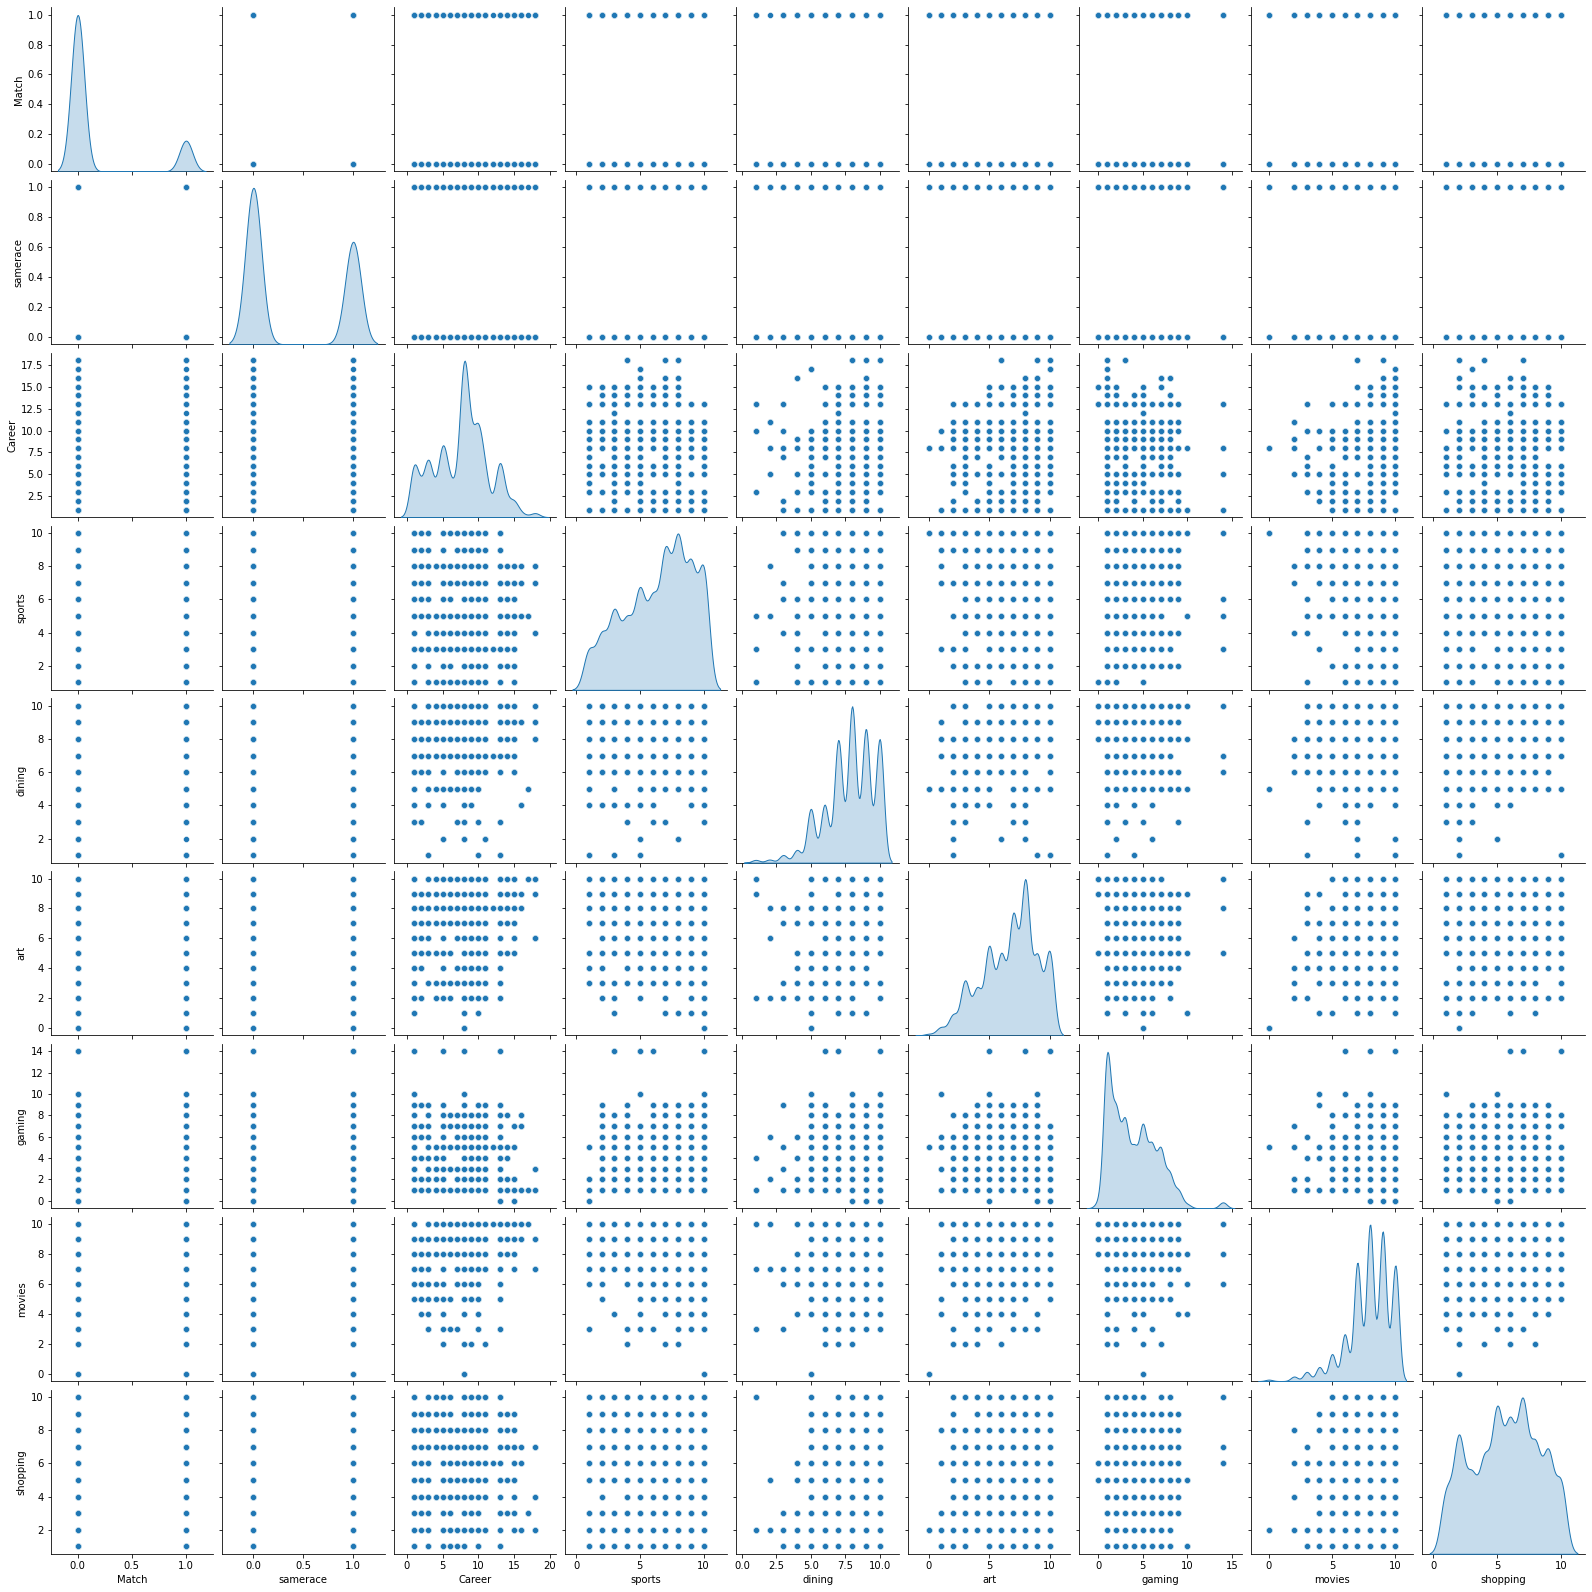

In [29]:
sns.pairplot(rename_df,diag_kind='kde')

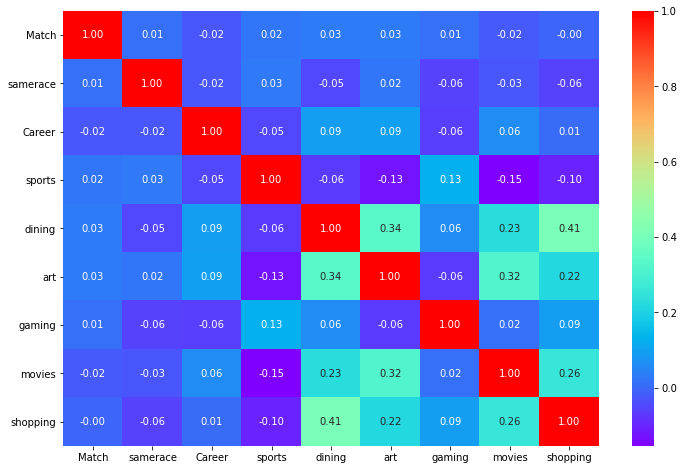

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(rename_df.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()